In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df = pd.read_csv('./house-prices-1.csv')

In [4]:
df['DurationFrom'] = pd.to_datetime(df['DurationFrom'], format='%Y-%m-%d')

In [5]:
df = df[['OrganisationLabel', 'DurationFrom', 'GeoEntityName', 'GeoName','AveragePrice' ,'AveragePriceDetached', 'AveragePriceSemiDetached', 'AveragePriceTerraced', 'AveragePriceFlatOrMaisonette']]

In [6]:
df.head()

,OrganisationLabel,DurationFrom,GeoEntityName,GeoName,AveragePrice,AveragePriceDetached,AveragePriceSemiDetached,AveragePriceTerraced,AveragePriceFlatOrMaisonette
0,Lincolnshire,2019-10-01,County,Lincolnshire,190317,251377,168595,135769,99165
1,Lincolnshire,2019-10-01,District Council,Boston,148645,204639,127749,102068,76677
2,Lincolnshire,2019-10-01,District Council,East Lindsey,183746,227343,156344,123702,90088
3,Lincolnshire,2019-10-01,District Council,Lincoln,156762,251991,170338,130887,103079
4,Lincolnshire,2019-10-01,District Council,North Kesteven,217448,263722,179488,148310,104026


In [7]:
df.sort_values('DurationFrom', inplace=True)

In [8]:
df['DurationFrom'].unique()

array(['2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [9]:
df.head()

,OrganisationLabel,DurationFrom,GeoEntityName,GeoName,AveragePrice,AveragePriceDetached,AveragePriceSemiDetached,AveragePriceTerraced,AveragePriceFlatOrMaisonette
95,Lincolnshire,2018-11-01,District Council,West Lindsey,167592,221197,142870,115942,91849
88,Lincolnshire,2018-11-01,County,Lincolnshire,185393,244775,163643,131908,100395
89,Lincolnshire,2018-11-01,District Council,Boston,154916,213280,132729,106213,81852
90,Lincolnshire,2018-11-01,District Council,East Lindsey,176206,217914,149508,118482,89125
94,Lincolnshire,2018-11-01,District Council,South Kesteven,218799,307889,198165,159352,112139


# Plot showing the median price of properties per year
<b>Note: The median price throughout the year is plotted as a dashed line</b>

<p>As apparent in plot, there is an <b>increase</b> in the median price of properties between November 2018 and October 2018 </p>

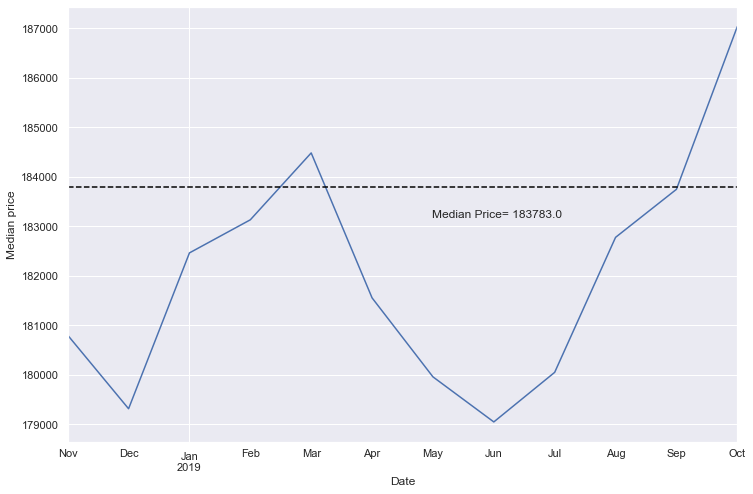

In [10]:
grp_date = df.groupby('DurationFrom')['AveragePrice']
ax = grp_date.median().plot(figsize=(12,8))

median_price = df['AveragePrice'].median()
ax.axhline(y=median_price, linestyle='--', color='black')
ax.annotate(f'Median Price= {median_price}', xy=(0.5, 0.48), xycoords='figure fraction')
ax.set_ylabel('Median price')
ax.set_xlabel('Date')
plt.savefig('./img/avg_price_year.jpg')

In [11]:
df['GeoName'].unique()

array(['West Lindsey', 'Lincolnshire', 'Boston', 'East Lindsey',
       'South Kesteven', 'North Kesteven', 'Lincoln', 'South Holland'],
      dtype=object)

# Bar chart to visualise the average price of properties per area

<p>As apparent in the bar chart, <b>South Kesteven</b> is the area with the highest average price </p>

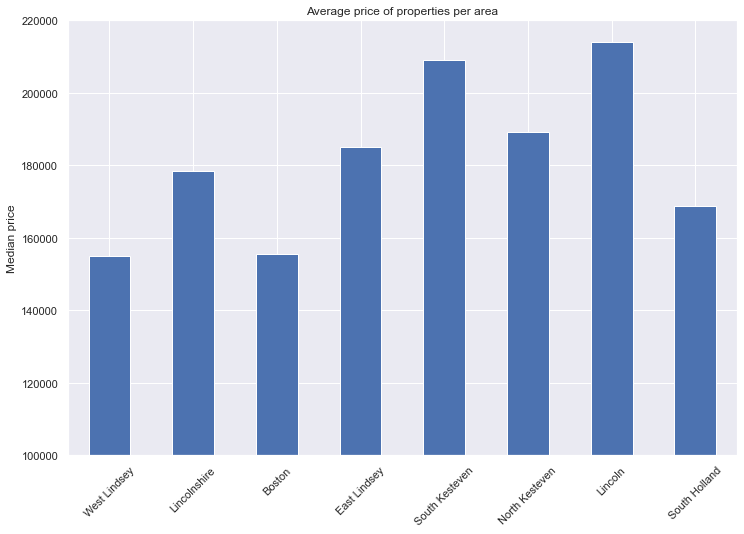

In [12]:
price_per_area= df.groupby('GeoName')['AveragePrice']
ax = price_per_area.median().plot.bar(figsize=(12,8))

ax.set_title('Average price of properties per area')
ax.set_xticklabels(df['GeoName'].unique(),rotation=45)
ax.set_ylim([100000, 220000])
ax.set_xlabel('')
ax.set_ylabel('Median price')
plt.savefig('./img/avg_price_area.jpg')

# Histogram to visualise the distribution of property prices in Lincolnshire

<p> The histogram shows that around 60% of properties in Lincolnshire have prices of <b>150,000-160,000, 180,000-190,000 and 210,000-220,000</b> </p>

/tmp/ipykernel_17345/4054716777.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, rotation=90)


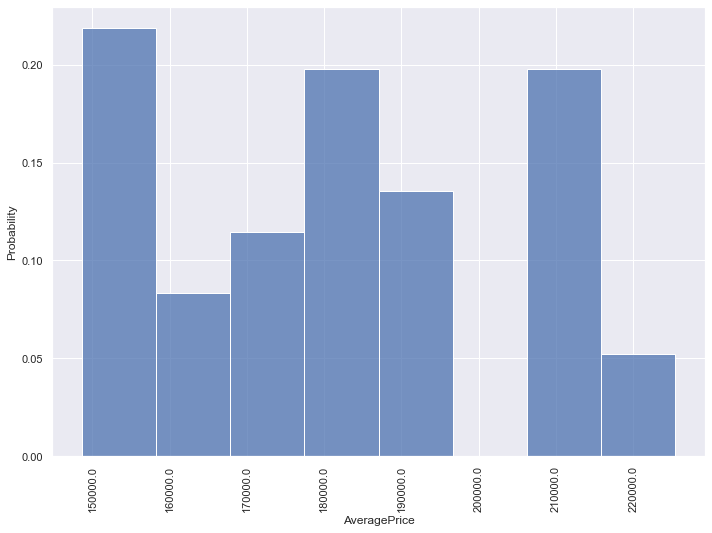

In [34]:
ax = sns.histplot(data=df['AveragePrice'], stat='probability')
xticks = ax.get_xticks()
ax.set_xticklabels(xticks, rotation=90)
plt.savefig('./img/hist_avg_price.jpg')
plt.show()

# Cumulative Distribution Function of average prices in Lincolnshire

<p>The cumulative distribution function proves our claim that average prices of properties in Lincolnshire are most concentrated around <b>150,000-160,000, 180,000-190,000 and 210,000-220,000.</b></p>

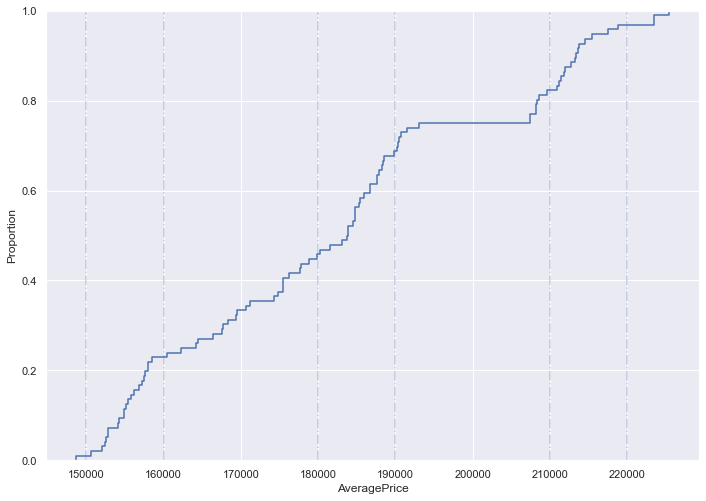

In [20]:
ax= sns.ecdfplot(data=df['AveragePrice'])

for x in [150000,160000,180000,190000,210000,220000]:
    ax.axvline(x, linestyle='dashdot', alpha=0.3)

# for y in [0.2, 0.4, 0.6, 0.8]:
#     ax.axhline(y, linestyle='dashed', color='black', alpha=0.3)
    
plt.savefig('./img/ecdf_avg_price.jpg')